In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df_master = pd.read_csv('data/returns_tone_master.csv')

In [3]:
df_master.head()

,date,price,returns,cik,file_name,filing_date,phi_pos,phi_neg,phi_npt,num_cleaned_words,ticker
0,2005-03-16,9.2306,-0.013551,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
1,2005-03-17,9.2976,0.007258,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
2,2005-03-18,9.3221,0.002635,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
3,2005-03-21,9.2529,-0.007423,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP
4,2005-03-22,8.9938,-0.028002,1130310,1130310_MDA_2005-03-16.txt,2005-03-16,0.031456,0.029121,0.038549,7280.0,CNP


In [4]:
for cols in ['date' , 'filing_date']:
    df_master[cols]  = pd.to_datetime(df_master[cols],format='%Y-%m-%d')
    
df_master['returns'].describe()

count    236005.000000
mean          0.001509
std           0.288962
min          -0.990096
25%          -0.008150
50%           0.000582
75%           0.009435
max          99.305387
Name: returns, dtype: float64

In [5]:
df_master=df_master[abs(df_master['returns']) <= df_master['returns'].std() * 3]

In [6]:
quantile_rank_labels = ['quantile_1','quantile_2','quantile_3','quantile_4','quantile_5']
df_master['quintile_tone_rank'] = df_master.groupby('date')['phi_npt'].transform(
    lambda x: pd.qcut(x=x , q=5 , labels=quantile_rank_labels))

In [7]:
sentiment_returns = df_master.groupby(['date' , 'quintile_tone_rank'])['returns'].mean().unstack()
sentiment_returns

quintile_tone_rank,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5
date,,,,,
2005-02-24,0.020009,NaN,NaN,NaN,0.029873
2005-02-25,0.006221,NaN,NaN,NaN,0.017834
2005-02-28,-0.006721,0.002292,-0.009611,-0.006633,-0.009890
2005-03-01,0.007352,0.004593,0.024596,0.001139,0.012133
2005-03-02,-0.003139,-0.007467,0.000705,0.005407,0.001424
...,...,...,...,...,...
2017-11-06,0.002644,0.011976,0.003512,-0.003414,0.006898
2017-11-07,-0.000964,-0.001781,0.001275,-0.000573,-0.014528
2017-11-08,-0.001682,0.001285,0.003480,0.004904,0.007759


<AxesSubplot:xlabel='date'>

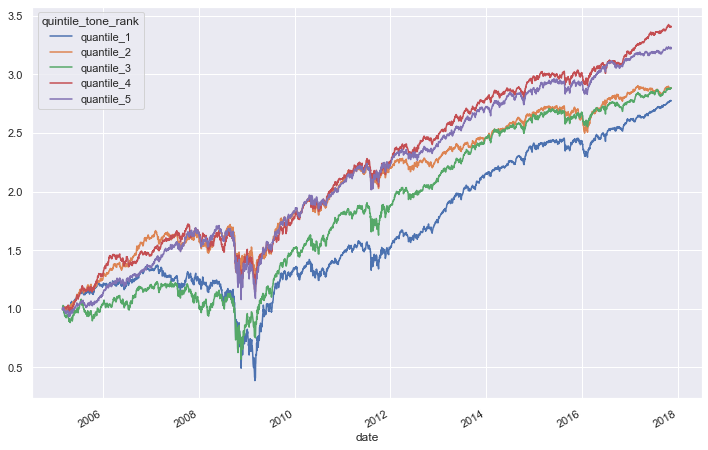

In [8]:
sentiment_returns.dropna(inplace=True)
sentiment_returns
(1 + sentiment_returns.cumsum()).plot(figsize=(12, 8))

<AxesSubplot:xlabel='date'>

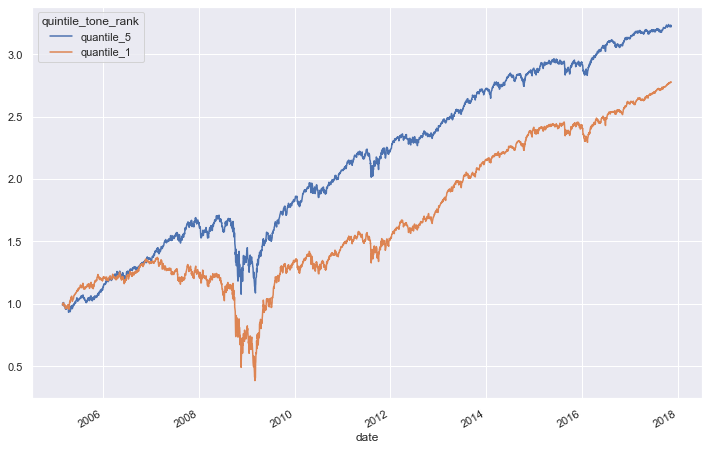

In [9]:
(1 + sentiment_returns[['quantile_5','quantile_1']].cumsum()).plot(figsize=(12, 8))

In [10]:
#Holding Period Return=HPT of two portfolios
quantile_5_return = (1 + sentiment_returns['quantile_5'].cumsum()[-1]/1 + sentiment_returns['quantile_5'].cumsum()[0])-1
quantile_1_return = (1 + sentiment_returns['quantile_1'].cumsum()[-1]/1 + sentiment_returns['quantile_1'].cumsum()[0])-1

In [11]:
quantile_5_return

2.214399363132561

In [12]:
quantile_1_return 

1.767587221999511

In [13]:
#tstat 
x_djk = (sentiment_returns['quantile_5']-sentiment_returns['quantile_1']).mean()
sigma_djk = (sentiment_returns['quantile_5']-sentiment_returns['quantile_1']).std()
tstat_value = (x_djk)/(sigma_djk/np.sqrt(len(sentiment_returns)))
tstat_value

1.0516585054996224

In [14]:
#due to Annual Report we think of analysing the data annually
#so first of all we have to separate the year of each date
years = sentiment_returns.index.year.unique()
years = [str(year) for year in years]

In [15]:
yearly_results={}
for year in years:
    df = sentiment_returns[year]
    print(df)
    results = stats.ttest_rel(df['quantile_5'], df['quantile_1'])
    yearly_results[year] = results

<ipython-input-15-537e5c60b634>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = sentiment_returns[year]
<ipython-input-15-537e5c60b634>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = sentiment_returns[year]
<ipython-input-15-537e5c60b634>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = sentiment_returns[year]
<ipython-input-15-537e5c60b634>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is 

quintile_tone_rank  quantile_1  quantile_2  quantile_3  quantile_4  quantile_5
date                                                                          
2005-02-28           -0.006721    0.002292   -0.009611   -0.006633   -0.009890
2005-03-01            0.007352    0.004593    0.024596    0.001139    0.012133
2005-03-02           -0.003139   -0.007467    0.000705    0.005407    0.001424
2005-03-03           -0.002653    0.000331    0.004094   -0.005462   -0.004653
2005-03-04            0.008558    0.020013    0.007742    0.008317    0.008014
...                        ...         ...         ...         ...         ...
2005-12-23            0.002685    0.002116    0.006083    0.001961    0.000109
2005-12-27           -0.006775   -0.005538   -0.004609   -0.007120   -0.010336
2005-12-28           -0.005903   -0.000749    0.008689    0.001379    0.005391
2005-12-29            0.000795   -0.002231    0.002852   -0.004102   -0.000374
2005-12-30           -0.004987   -0.002997   -0.0138

quintile_tone_rank  quantile_1  quantile_2  quantile_3  quantile_4  quantile_5
date                                                                          
2017-01-03            0.009682    0.008605    0.012546    0.003275    0.007657
2017-01-04            0.012235    0.004094    0.008216    0.013077    0.008918
2017-01-05           -0.000905   -0.002532   -0.002634   -0.009818    0.005776
2017-01-06            0.000033    0.006531    0.002987    0.010104    0.003142
2017-01-09           -0.005607   -0.008279   -0.003728   -0.003462   -0.006427
...                        ...         ...         ...         ...         ...
2017-11-06            0.002644    0.011976    0.003512   -0.003414    0.006898
2017-11-07           -0.000964   -0.001781    0.001275   -0.000573   -0.014528
2017-11-08           -0.001682    0.001285    0.003480    0.004904    0.007759
2017-11-09           -0.001651   -0.001855   -0.003083   -0.004096   -0.004377
2017-11-10            0.000917   -0.000686   -0.0003

<ipython-input-15-537e5c60b634>:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = sentiment_returns[year]


In [16]:
df_yearly_results = pd.DataFrame(yearly_results)
df_yearly_results.index = ['t-stat' , 'p-value']

<AxesSubplot:xlabel='date'>

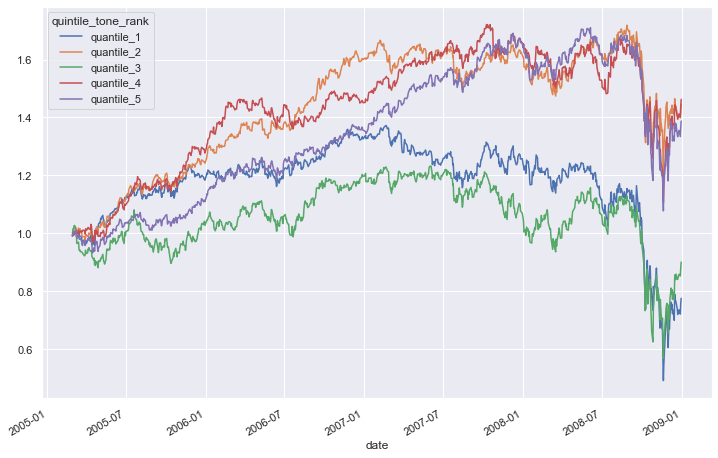

In [17]:
(1 + sentiment_returns['2004':'2008'].cumsum()).plot(figsize=(12, 8))

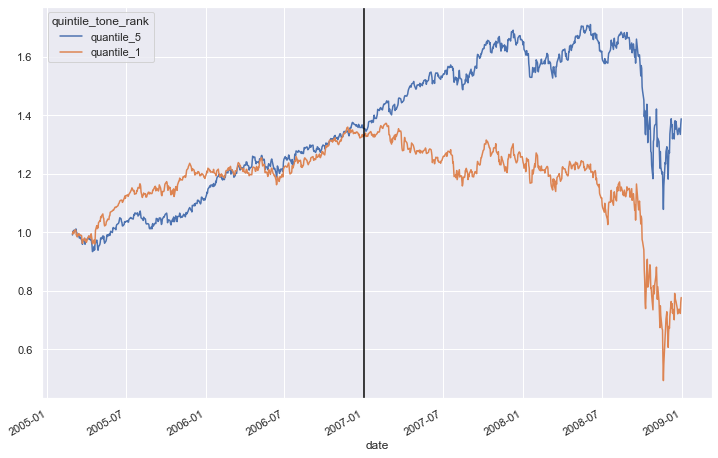

In [18]:
(1 + sentiment_returns['2004':'2008'][['quantile_5' , 'quantile_1']].cumsum()).plot(figsize=(12, 8))
plt.axvline(years[years.index('2007')],color='black')